In [ ]:
%pylab inline
# this imports numpy and matplotlib

Populating the interactive namespace from numpy and matplotlib


**A combined Signal (10 Hz + 200 Hz)**



In [ ]:
# lets create a combined sine wave
fs = 10000
t = np.arange(0, 1, step = 1. / fs)

frequency1 = 10
frequency2 = 200
s_t = np.sin(2 * np.pi * frequency1 * t) + np.sin(2 * np.pi * frequency2 * t)

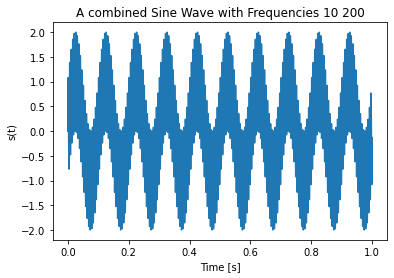

In [ ]:
plt.xlabel('Time [s]')
plt.ylabel('s(t)')
plt.title('A combined Sine Wave with Frequencies ' + str(frequency1) + ' ' + str(frequency2))
plt.plot(t, s_t)

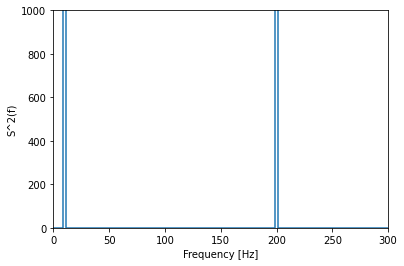

In [ ]:
# let's create the fourier transform
# you clearly see both frequencies (10hz and 200hz) in the spectrum
S = np.fft.rfft(s_t)

# power spectrum
S_pow = S ** 2

plt.xlim(0,300)
plt.ylim(0,1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('S^2(f)')
plt.plot(np.abs(S_pow))

**A simple 10Hz Sine Wave**

In [ ]:
# lets create a simple sine wave
fs = 10000
t = np.arange(0, 1, step = 1. / fs)

frequency = 10
s_t = np.sin(2 * np.pi * frequency * t)

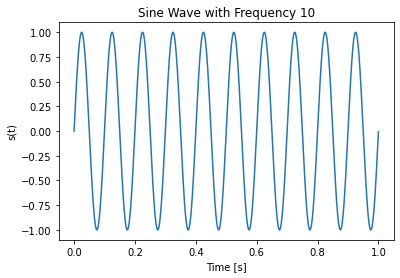

In [ ]:
plt.xlabel('Time [s]')
plt.ylabel('s(t)')
plt.title('Sine Wave with Frequency ' + str(frequency))
plt.plot(t, s_t)

In [ ]:
from IPython.display import Audio
Audio(s_t, rate=fs) # note this only works for higher frequencies since audible range is 20Hz-20kHz

**The 10Hz wave has a very clean power spectrum with only a bump at 10Hz**

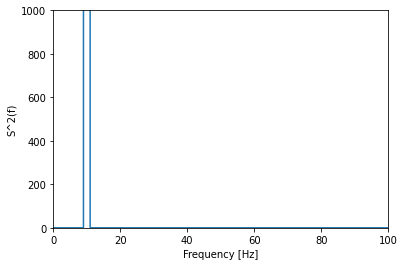

In [ ]:
# let's create the fourier transform
S = np.fft.rfft(s_t)

# power spectrum
S_pow = S ** 2

plt.xlim(0,100)
plt.ylim(0,1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('S^2(f)')
plt.plot(np.abs(S_pow))

**We can restore the signal perfectly with the Inverse Fourier Transformation**

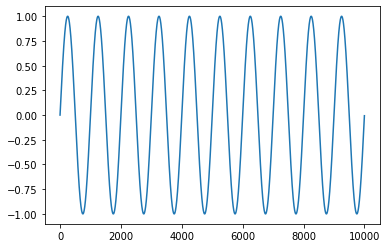

In [ ]:
# we restore the original signal by using the inverse fourier transformation
restored_S = np.sqrt( S_pow ) # sqrt here!
inv_S = np.fft.irfft( restored_S )

plt.plot(inv_S)

**Let's do some De-Noising!**

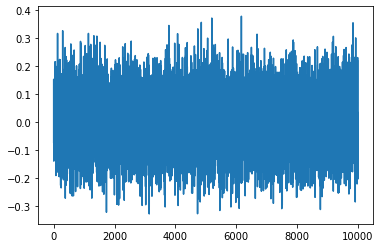

In [ ]:
# let's create some random noise
noise = np.random.normal(0., 0.1, s_t.shape)

plt.plot(noise)

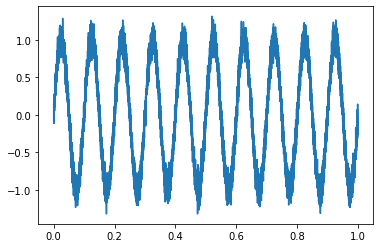

In [ ]:
# let's add some noise to s(t)
# now the signal is very rough
s_t_noise = s_t + noise

plt.plot(t, s_t_noise)

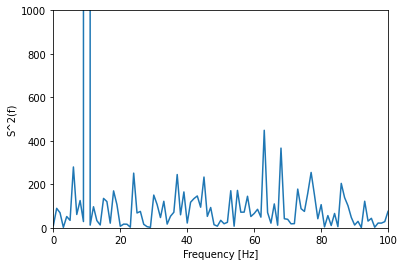

In [ ]:
# create fourier transform
S_noise = np.fft.fft(s_t_noise)

# power spectrum (we see the roughness here as well!)
S_noise_pow = S_noise ** 2

plt.xlim(0,100)
plt.ylim(0,1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('S^2(f)')
plt.plot(np.abs(S_noise_pow))

**Amplitude-filter (aka. Thresholding)**

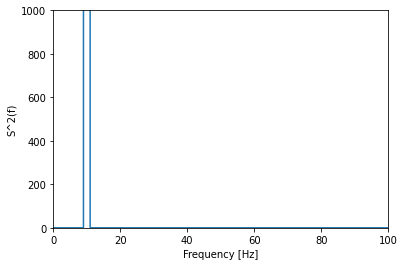

In [ ]:
# the amplitude filter (thresholding) works very well in this case and removes all noise from the spectrum
# but this is not the usual way of filtering since low-pass and high-pass work on frequencies
S_noise_pow_amplitude_filter = np.abs(S_noise_pow).copy()
S_noise_pow_amplitude_filter[S_noise_pow_amplitude_filter < 600] = 0

plt.xlim(0,100)
plt.ylim(0,1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('S^2(f)')
plt.plot(np.abs(S_noise_pow_amplitude_filter))

**Low-pass filter to remove high-frequency noise**

In [ ]:
## low pass filter
S_noise_pow[11:] = 0 # everything above 11 is zero'ed

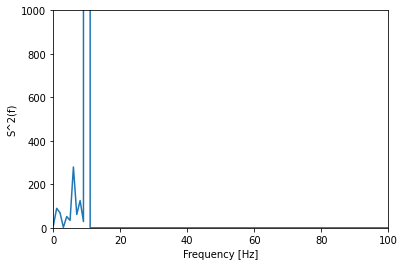

In [ ]:
# the low pass filter lets only frequencies below 11 pass-thru..
# you see the noise disappeared in frequencies above that in the spectrum
plt.xlim(0,100)
plt.ylim(0,1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('S^2(f)')
plt.plot(np.abs(S_noise_pow))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


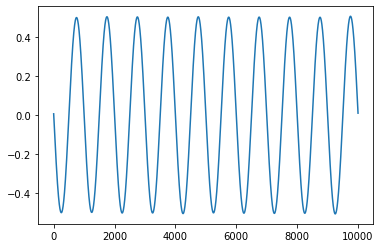

In [ ]:
# we restore the original signal by using the inverse fourier transformation
# AND LOOK HOW SMOOTH IT IS AGAIN SINCE WE FILTERED OUT THE NOISE
restored_S = np.sqrt( S_noise_pow ) # sqrt here!
inv_S = np.fft.ifft( restored_S )

plt.plot(inv_S)

**High-pass filter**

In [ ]:
# re-create fourier transform
S_noise = np.fft.fft(s_t_noise)

# power spectrum (we see the roughness here as well!)
S_noise_pow = S_noise ** 2

## high pass filter
S_noise_pow[0:11] = 0 # everything below 10 is zero'ed

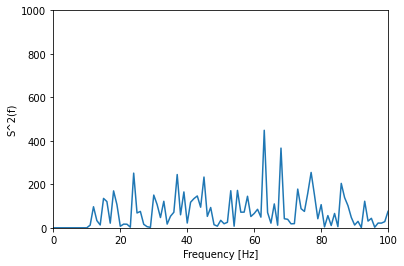

In [ ]:
# here we see that all frequencies below 10 are zero'ed
plt.xlim(0,100)
plt.ylim(0,1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('S^2(f)')
plt.plot(np.abs(S_noise_pow))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


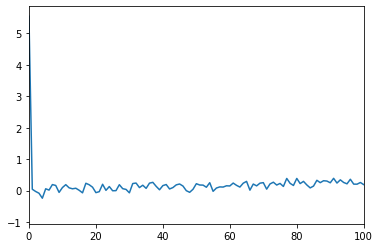

In [ ]:
# when restoring, this is now more-or-less just the noise signal!!

restored_S = np.sqrt( S_noise_pow ) # sqrt here!
inv_S = np.fft.ifft( restored_S )

plt.xlim(0,100)
plt.plot(inv_S)

**Band-pass Filter**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


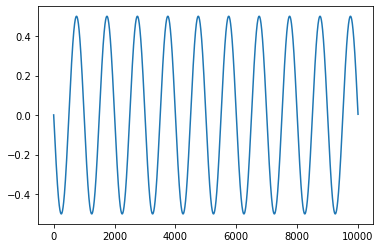

In [ ]:

# re-create fourier transform
S_noise = np.fft.fft(s_t_noise)

# power spectrum (we see the roughness here as well!)
S_noise_pow = S_noise ** 2

# BAND PASS FILTER COMBINES LOW PASS AND HIGH PASS

## low pass filter
S_noise_pow[11:] = 0 # everything above 11 is zero'ed

## high pass filter
S_noise_pow[0:10] = 0 # everything below 10 is zero'ed


# we restore the original signal by using the inverse fourier transformation
restored_S = np.sqrt( S_noise_pow ) # sqrt here!
inv_S = np.fft.ifft( restored_S )

# plt.xlim(0,100)
plt.plot(inv_S)